<a href="https://colab.research.google.com/github/CodeName-Cho/Assignment/blob/main/ESAA_Week8_Mon_kaggle_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA To Prediction (DieTanic)


## Part1: Exploratory Data Analysis(EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('/content/drive/MyDrive/ESAA/data/1104ESAA_HW_train.date.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum() #checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The **Age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived??

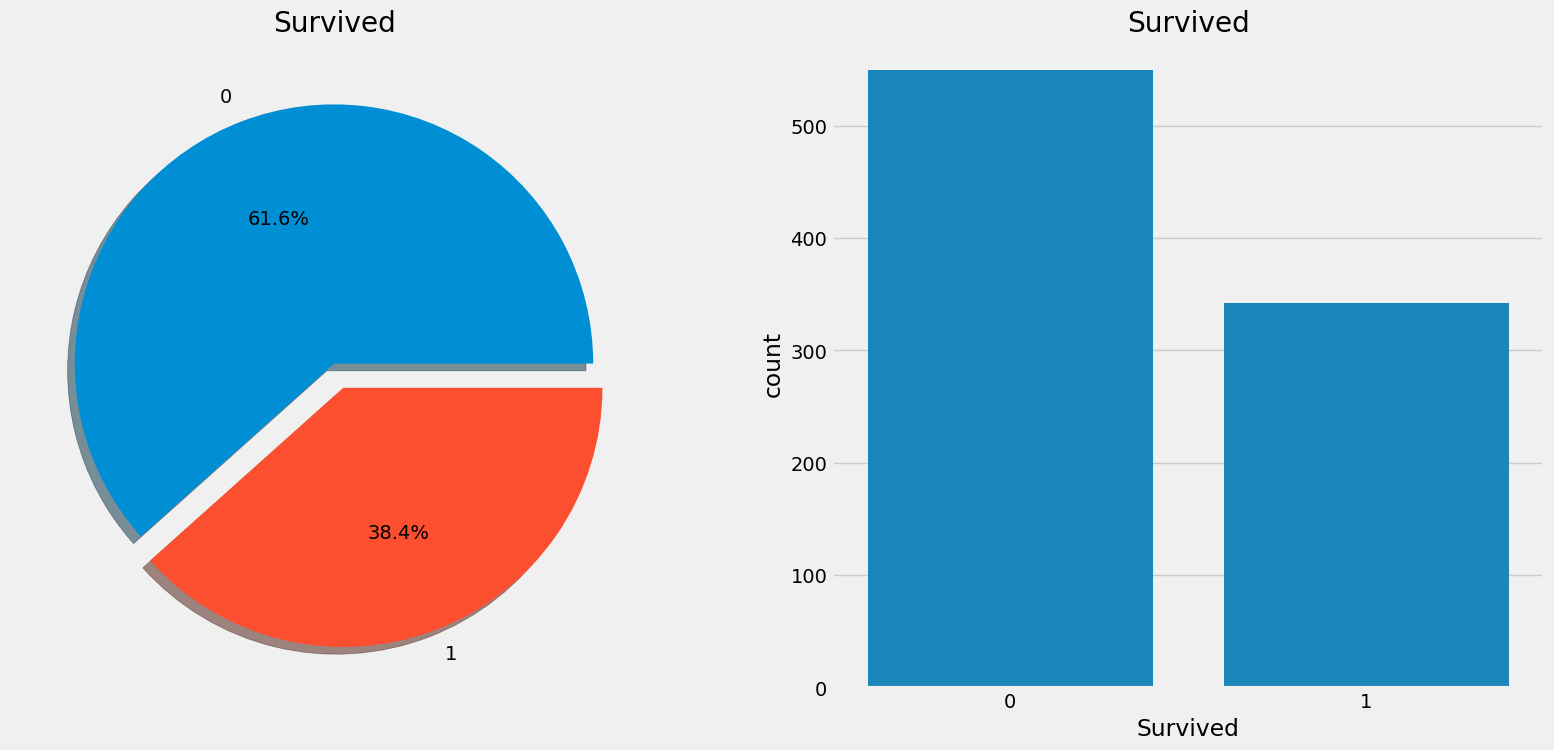

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features

## Sex--> Categorical Feature

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

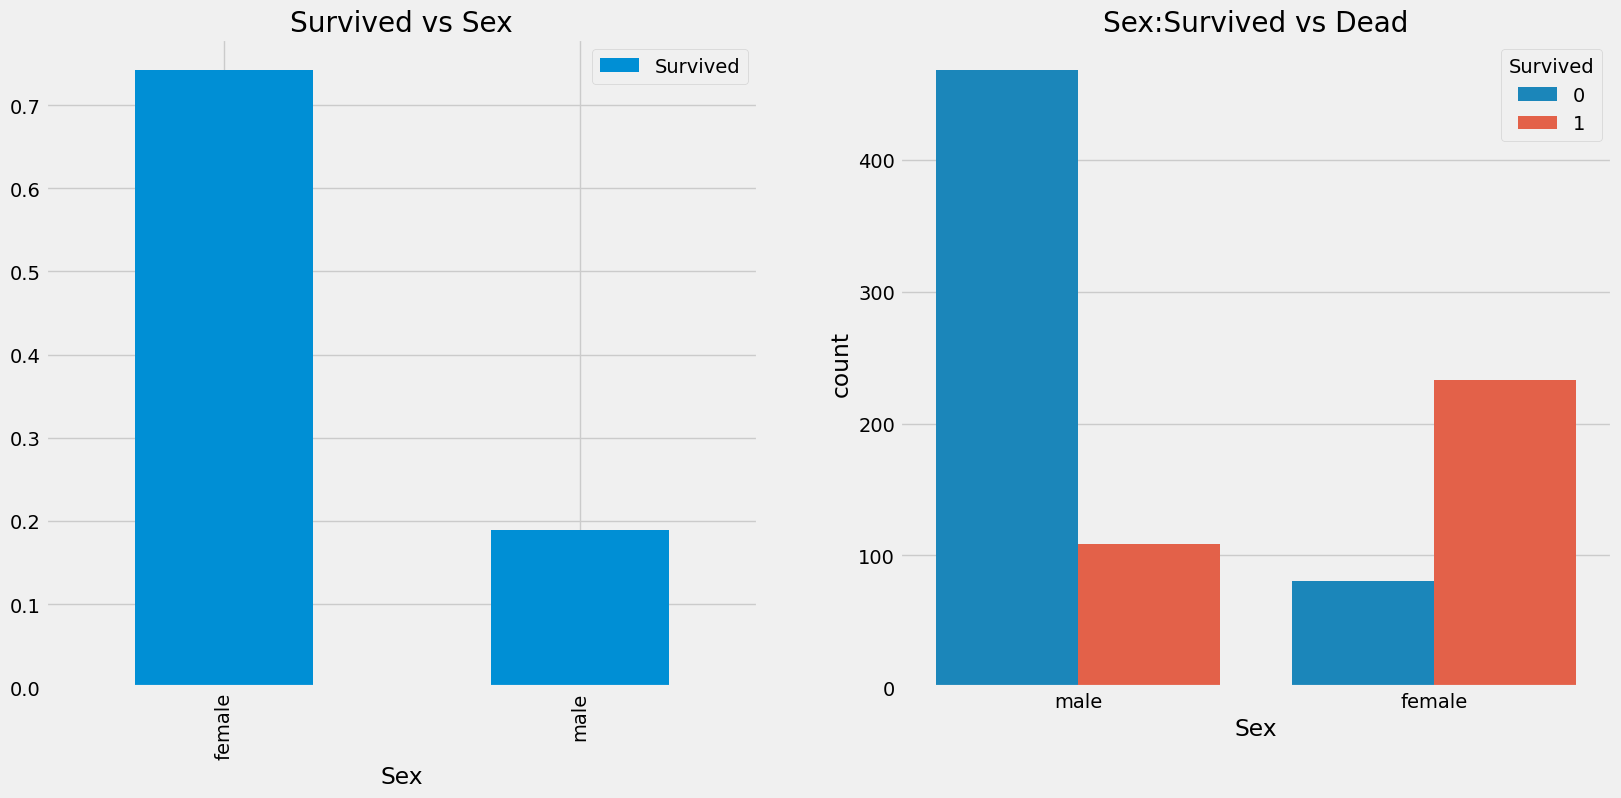

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

## Pclass --> Ordinal Feature

In [12]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


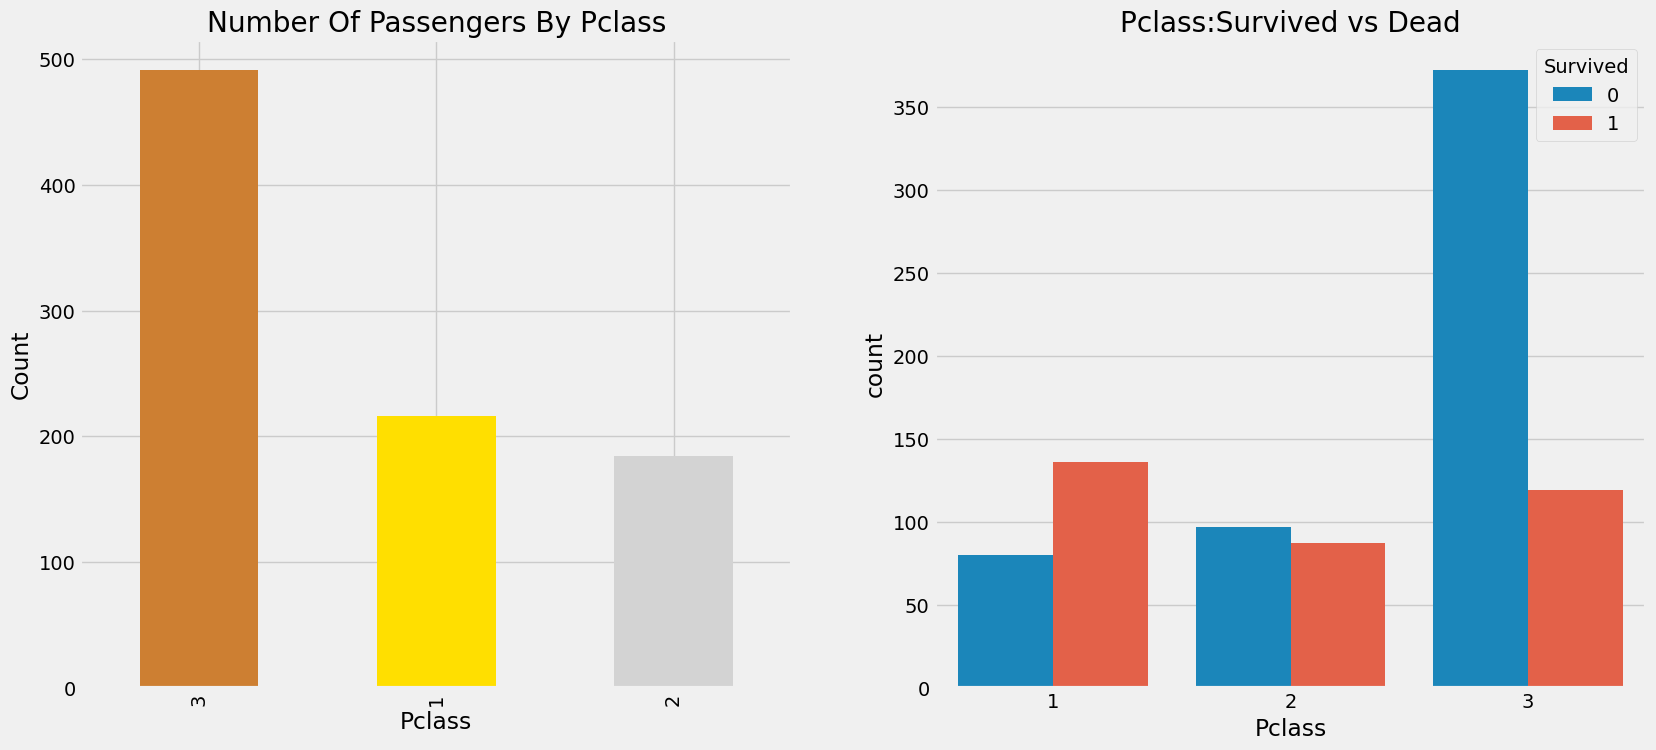

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [15]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

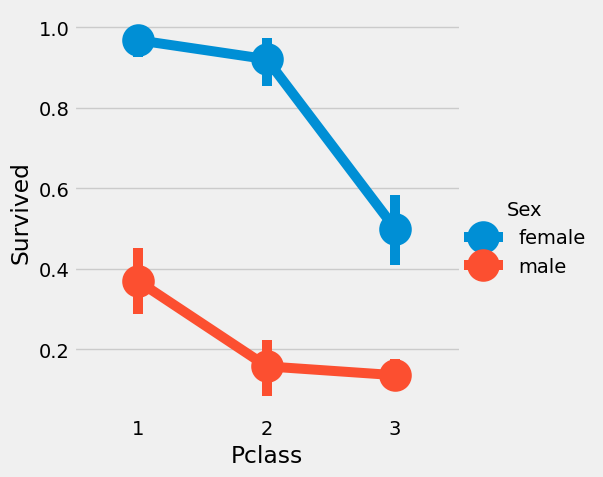

In [17]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

## Age--> Continous Feature


In [18]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


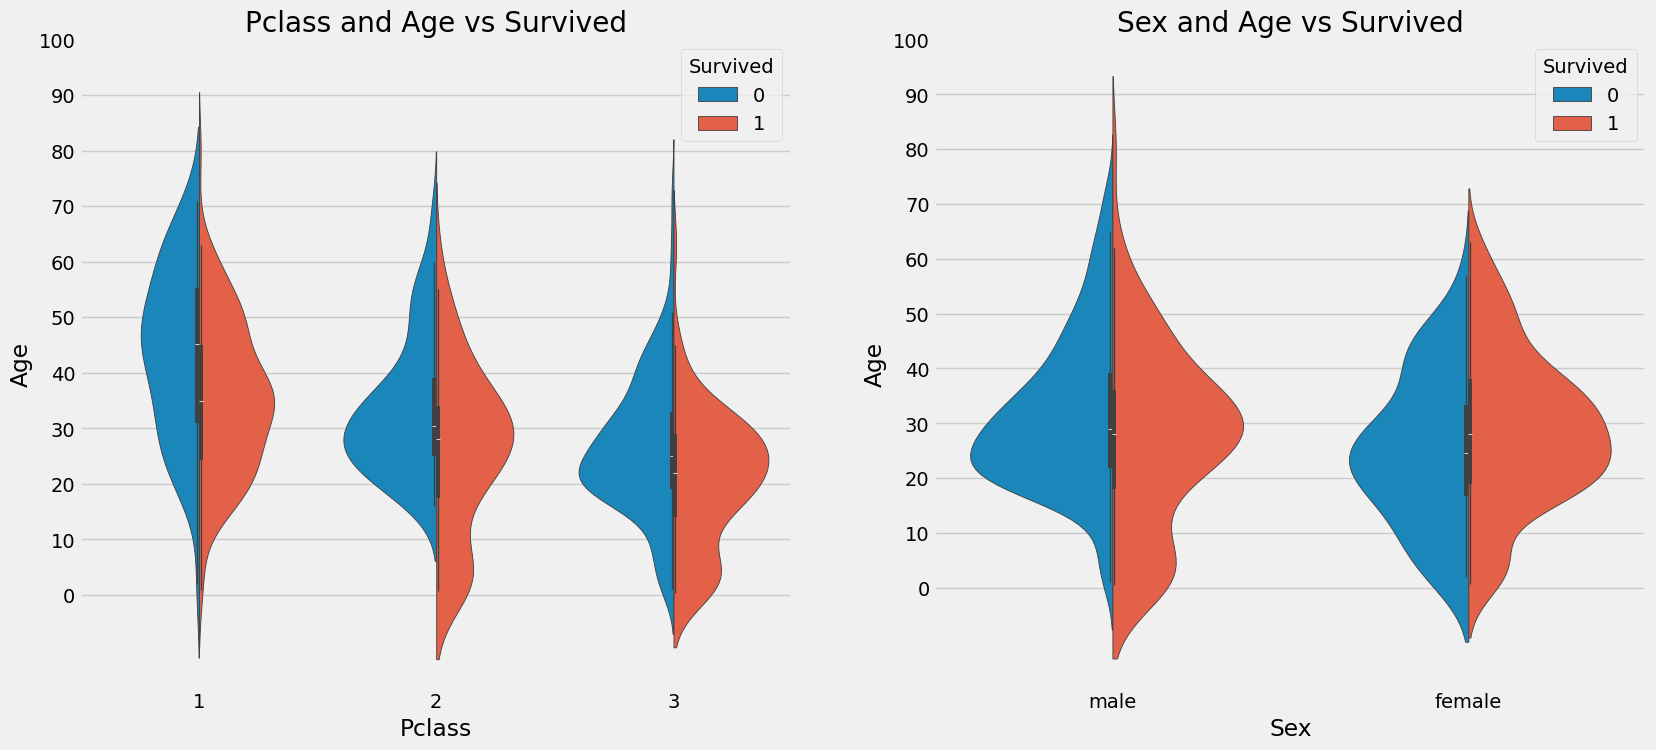

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations:

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

In [20]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [21]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


### Filling NaN Ages

In [24]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [25]:
data.Age.isnull().any() #So no null values left finally

False

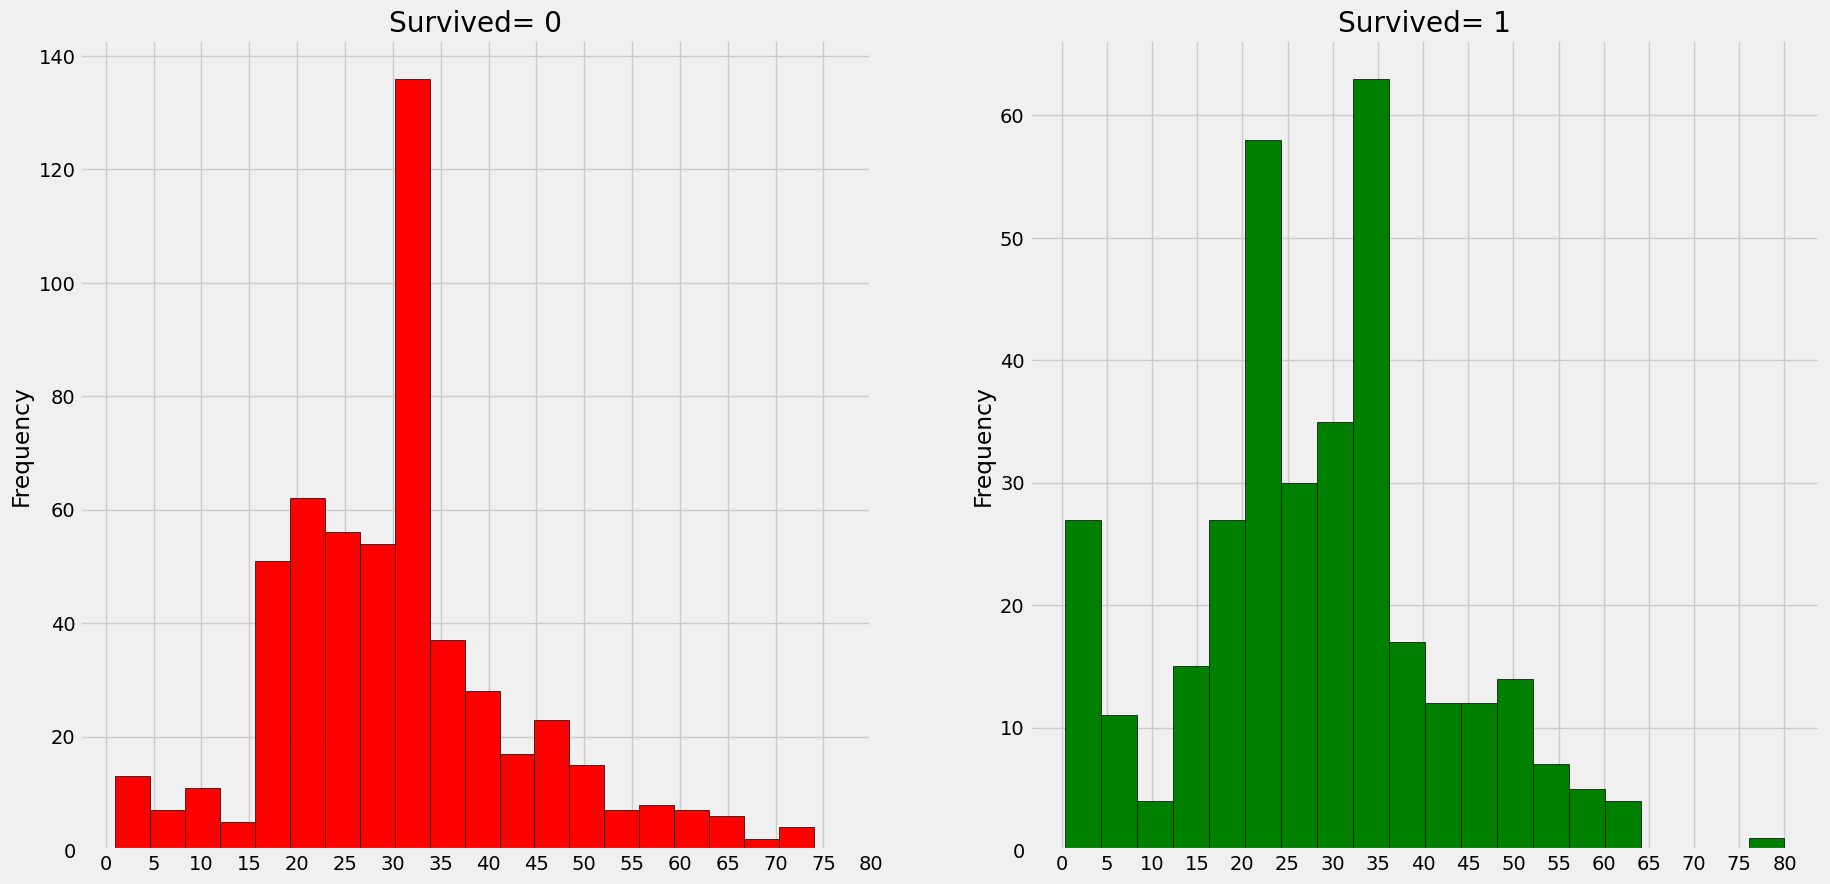

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

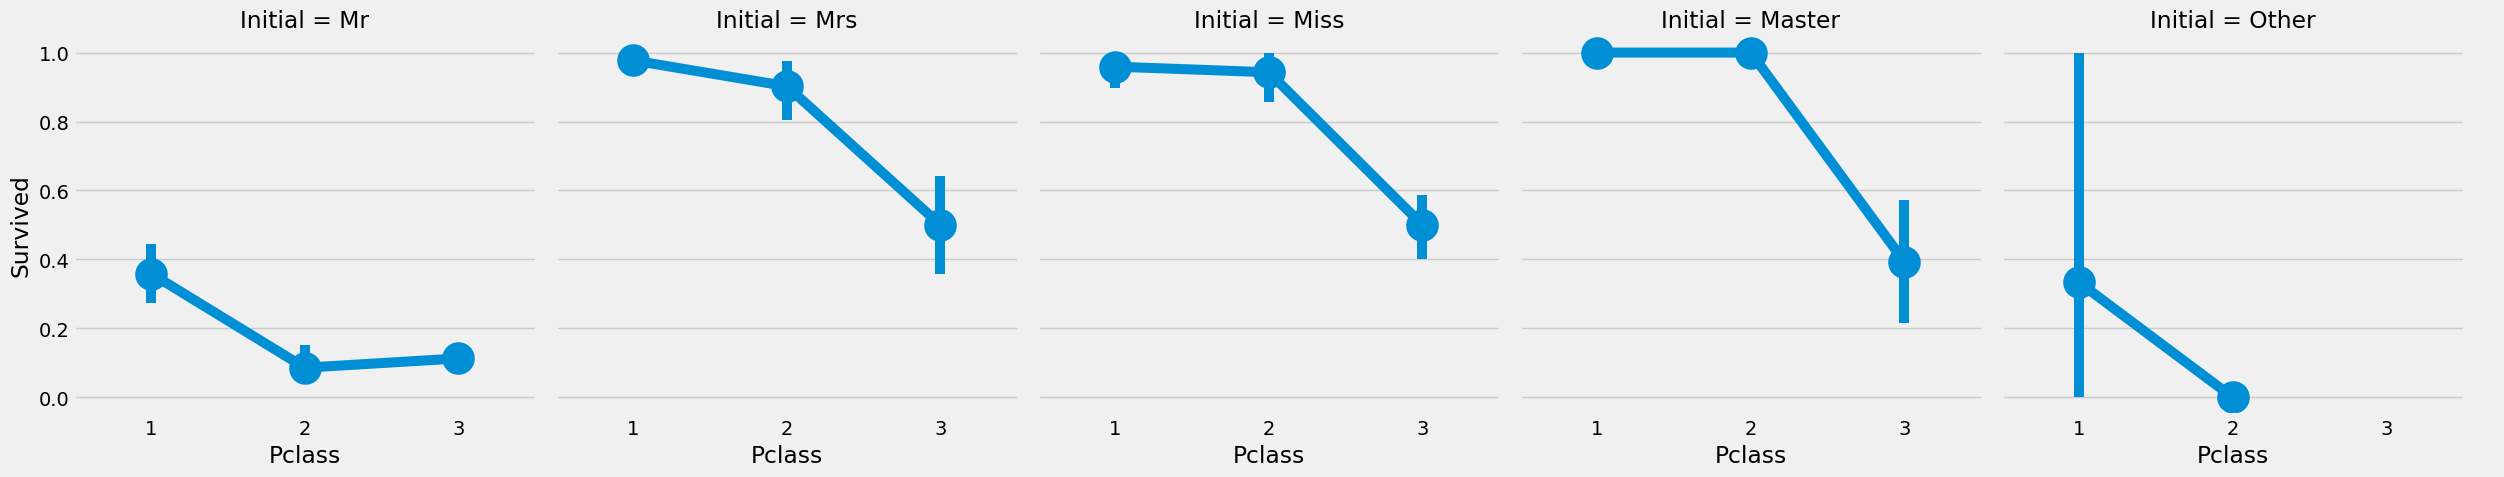

In [28]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

## Embarked--> Categorical Value

In [29]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

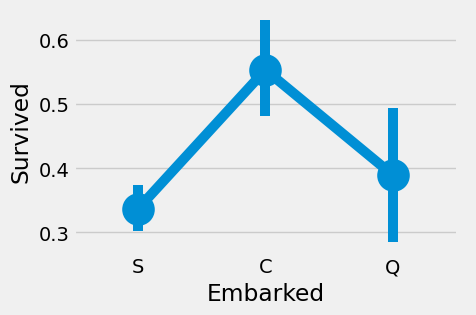

In [32]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
plt.gcf().set_size_inches(5,3)
plt.show()

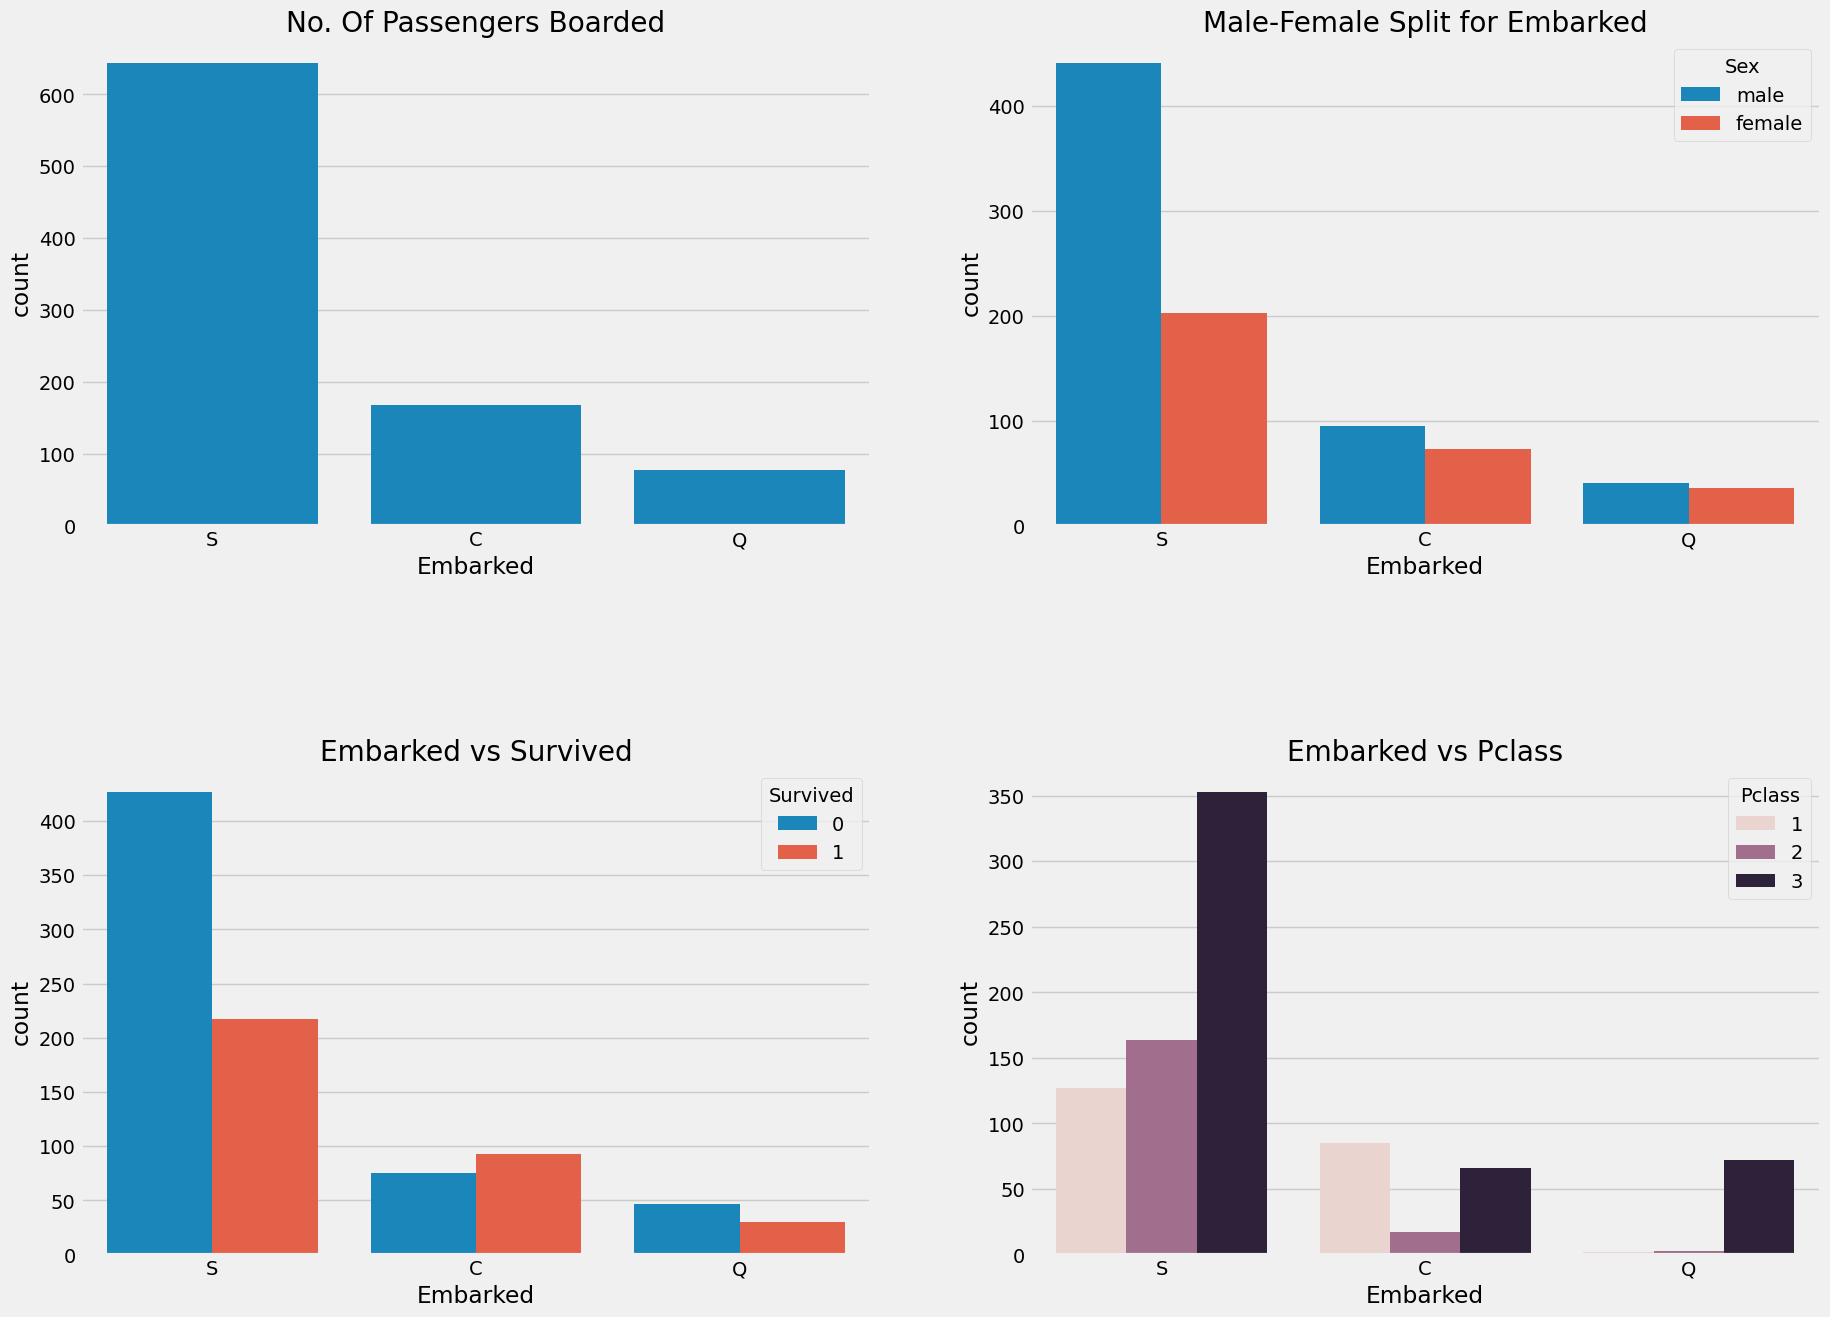

In [33]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations:
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around **81%** didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.

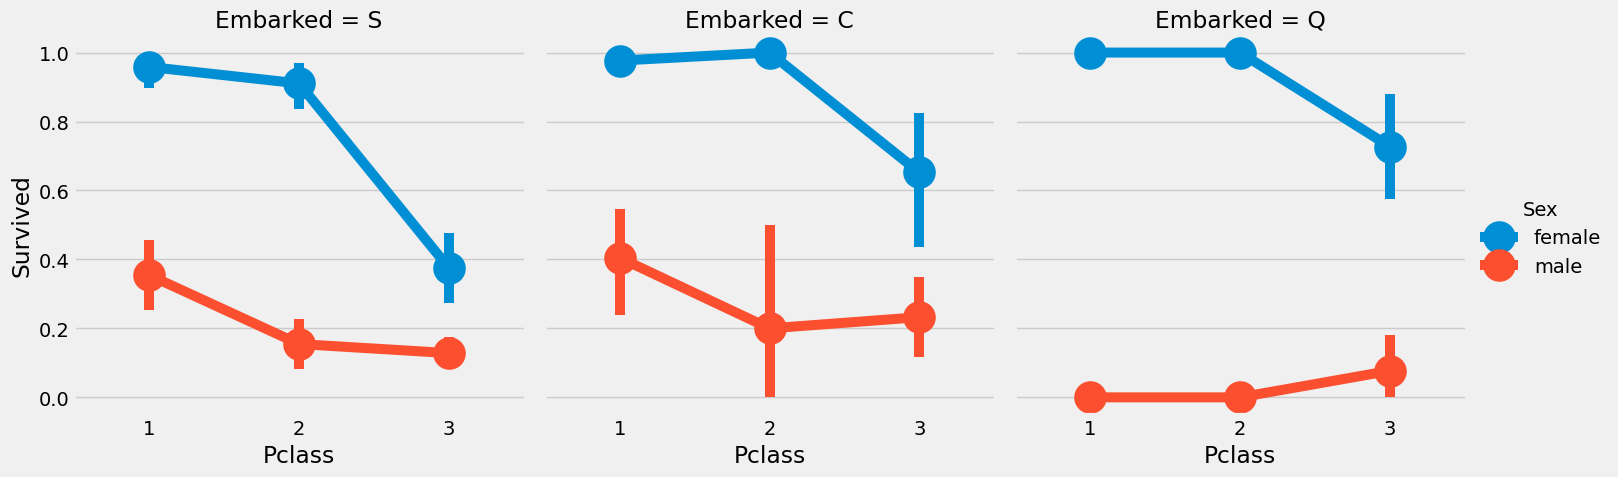

In [34]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

### Observations:

1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.**(Money Matters)**

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.


### Filling Embarked NaN

In [35]:
data['Embarked'].fillna('S',inplace=True)

In [36]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [37]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


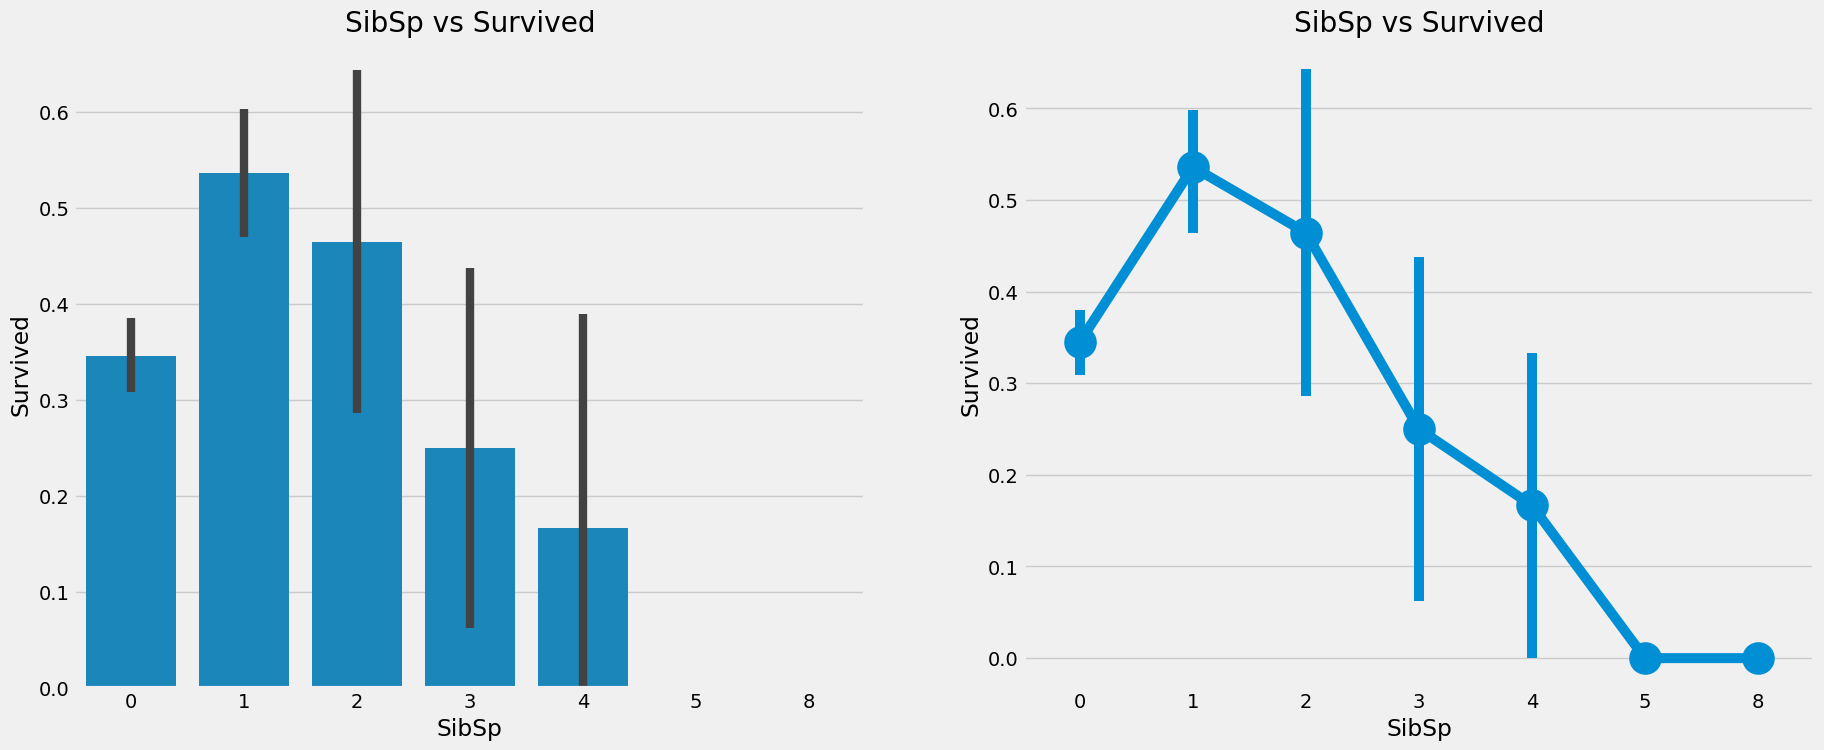

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [39]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Observations:


The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be Pclass??

The reason is **Pclass**. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

## Parch

In [40]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


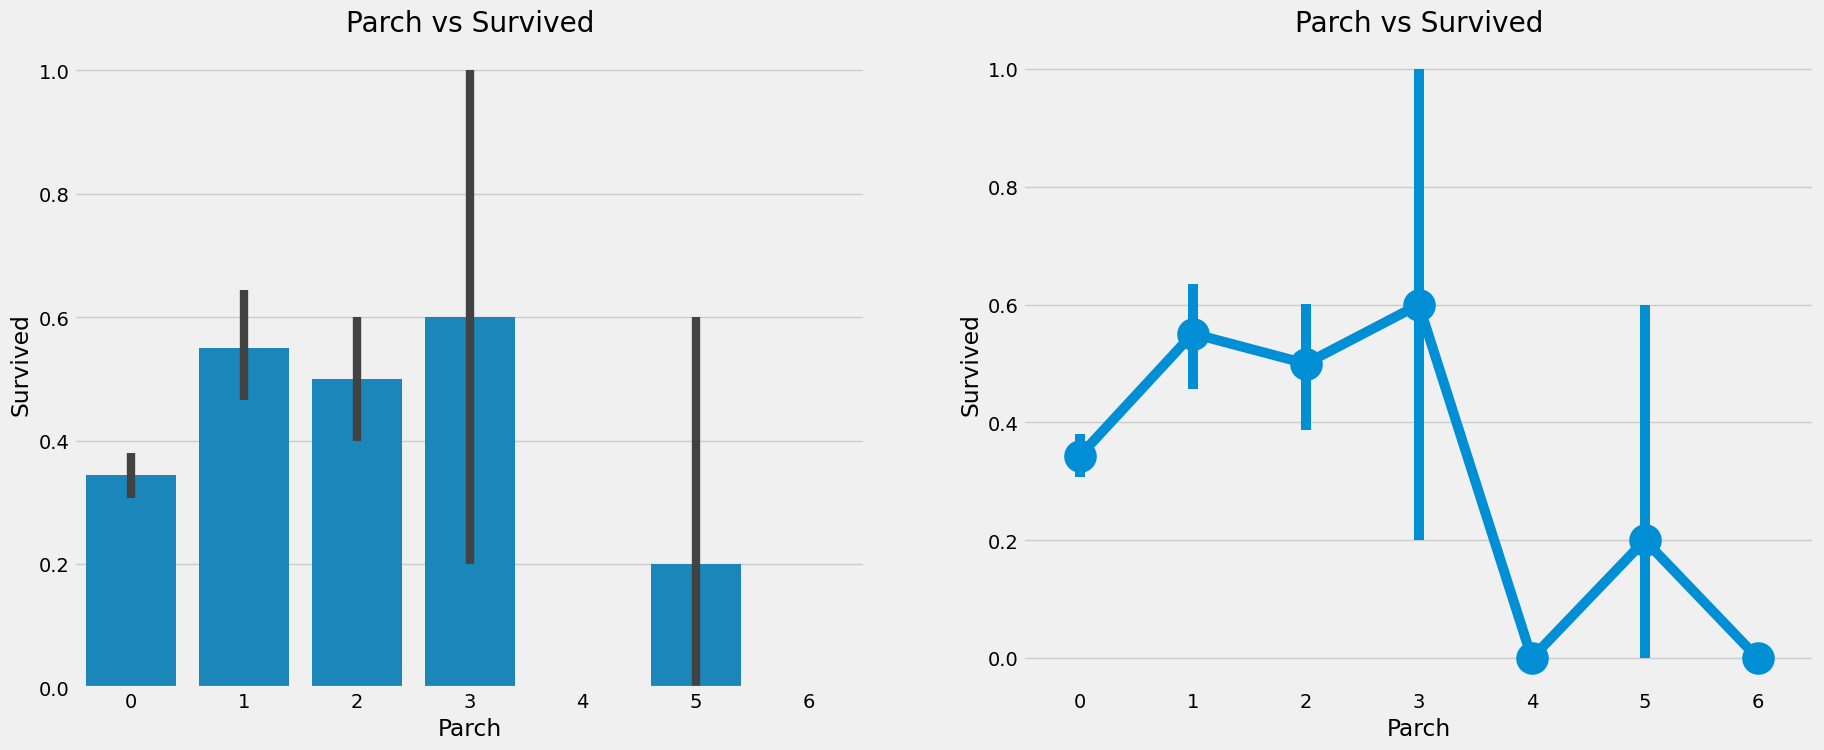

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### Observations:

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

## Fare--> Continous Feature

In [42]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


The lowest fare is **0.0**. Wow!! a free luxorious ride.

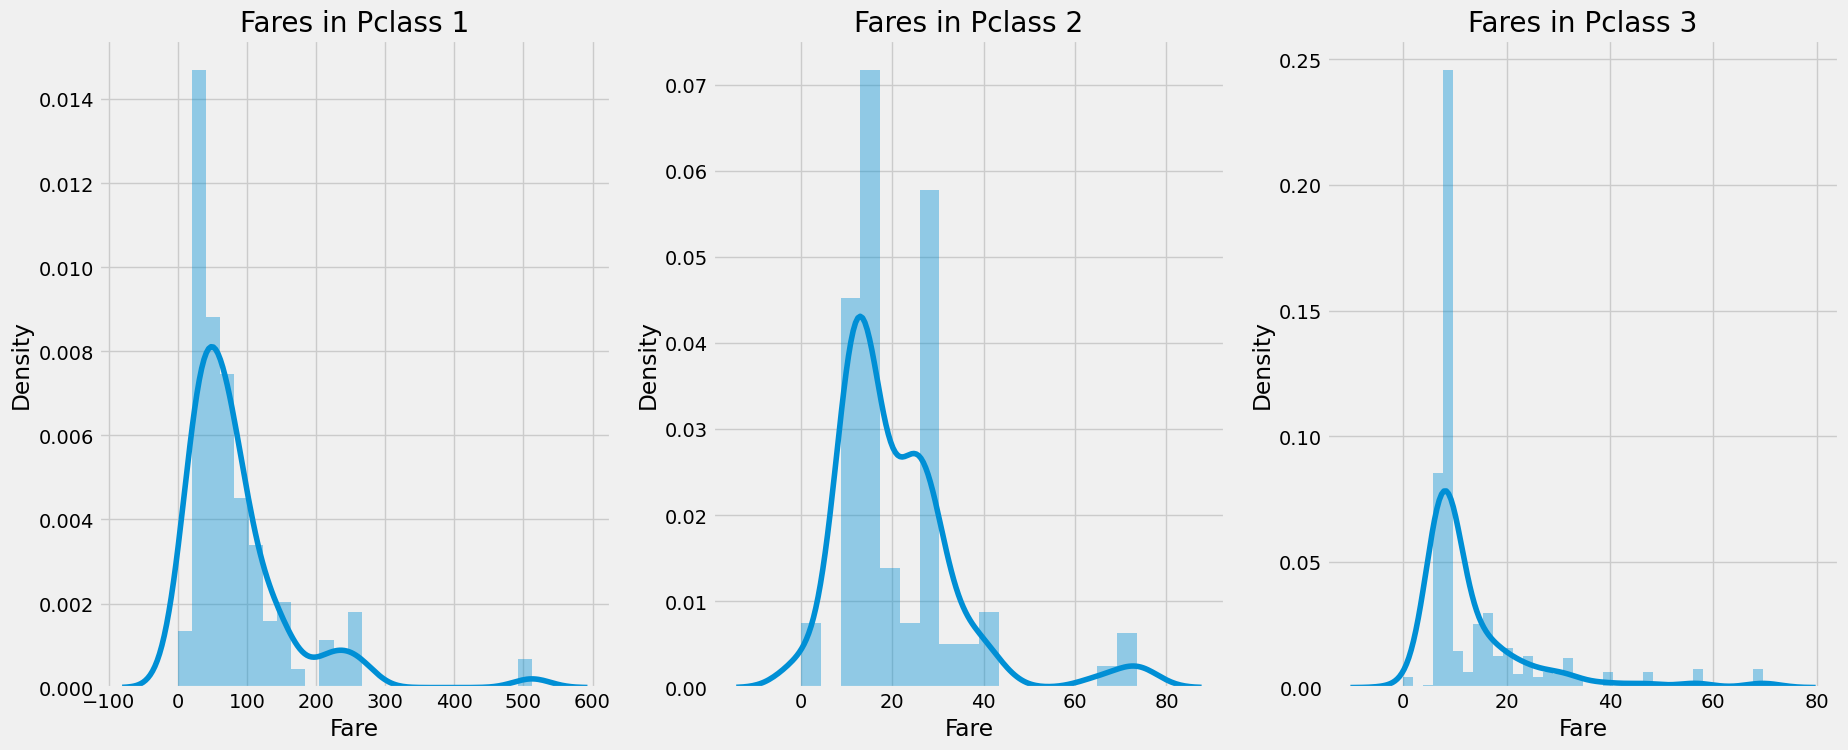

In [43]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## Observations in a Nutshell for all features:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**.

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**.

**Parch+SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

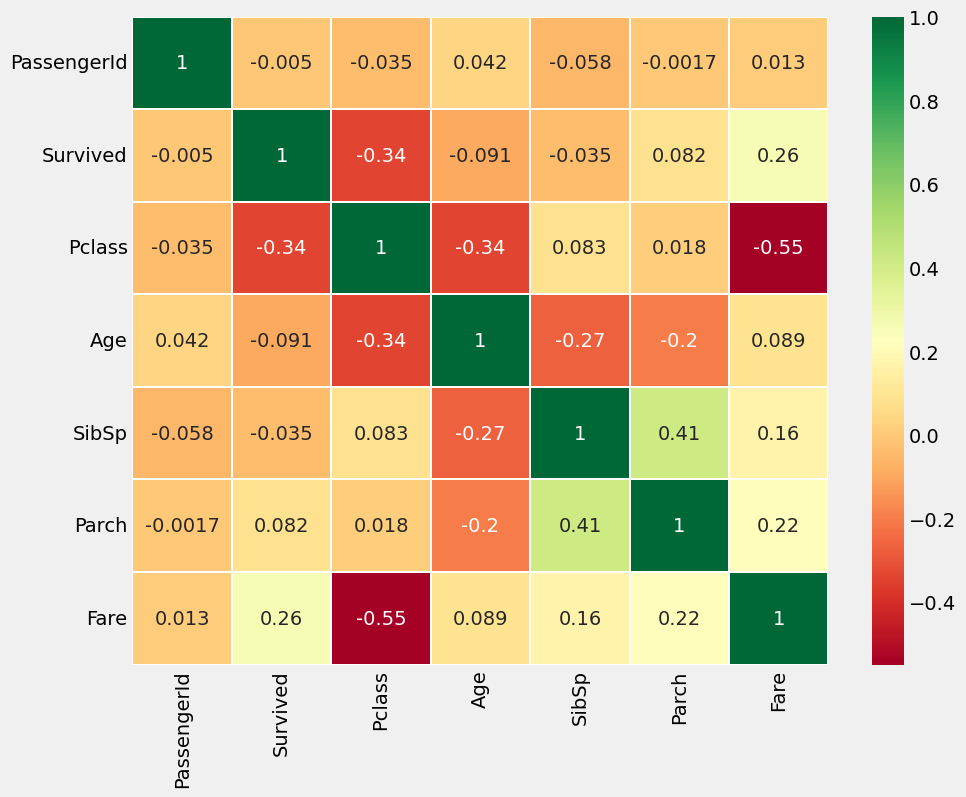

In [45]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.gcf().set_size_inches(10, 8)
plt.show()

## Part2: Feature Engineering and Data Cleaning

## Age_band

In [46]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [47]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


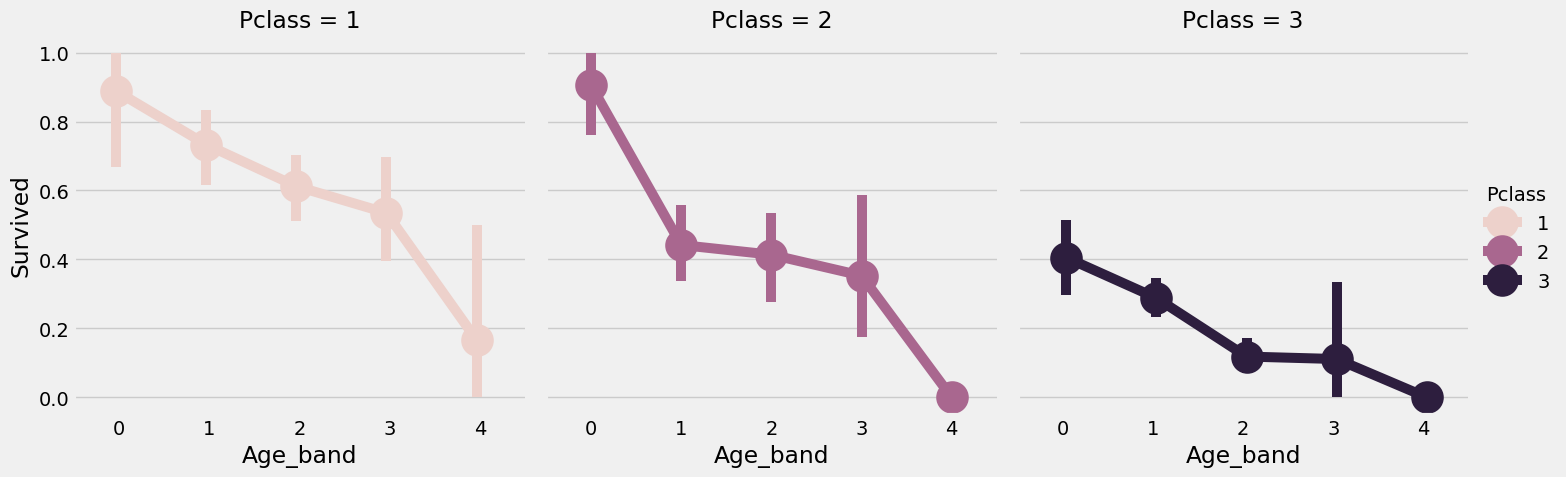

In [50]:
sns.catplot(x='Age_band', y='Survived', hue='Pclass', data=data, kind='point', col='Pclass', dodge=True)
plt.show()

## Family_Size and Alone

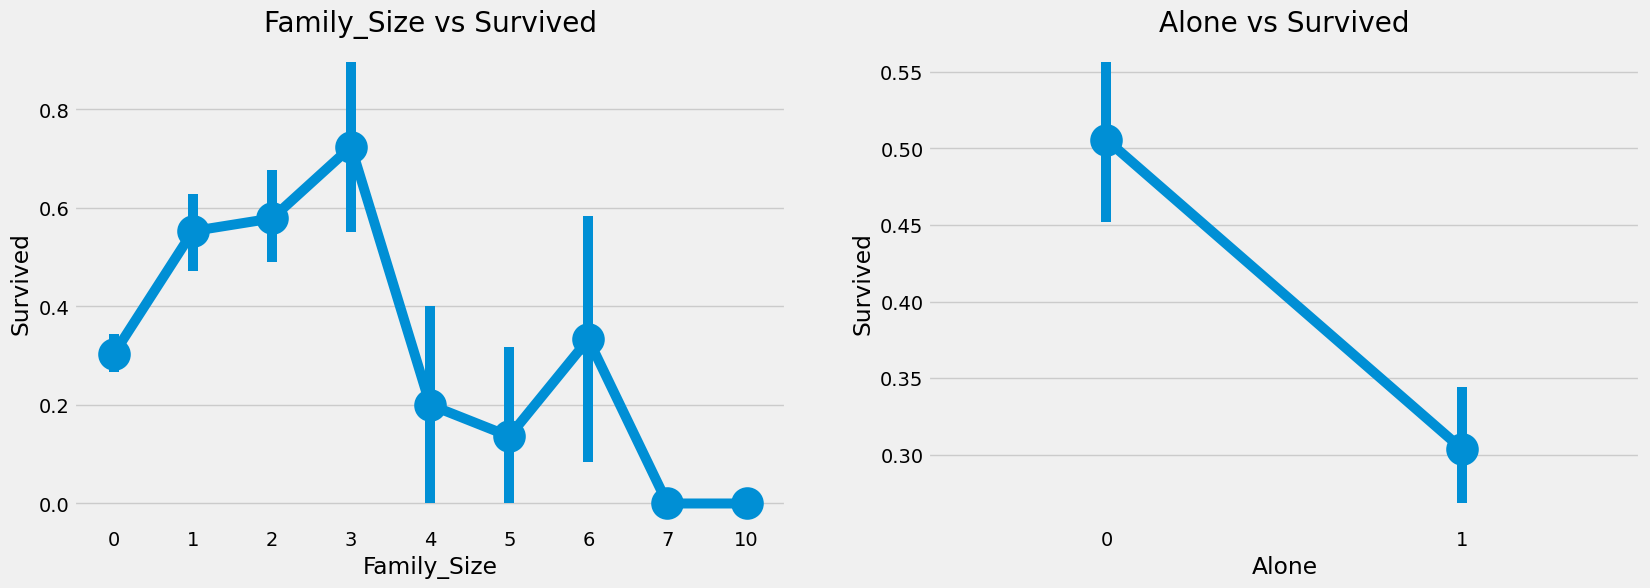

In [52]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

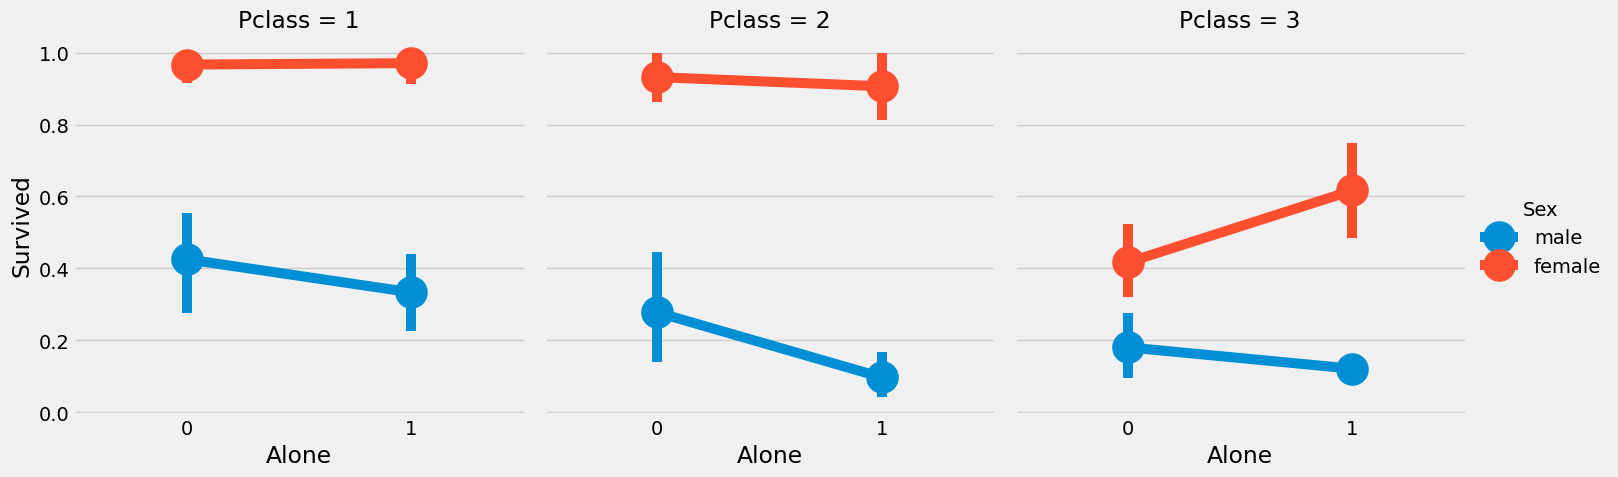

In [53]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

## Fare_Range

In [54]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [55]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

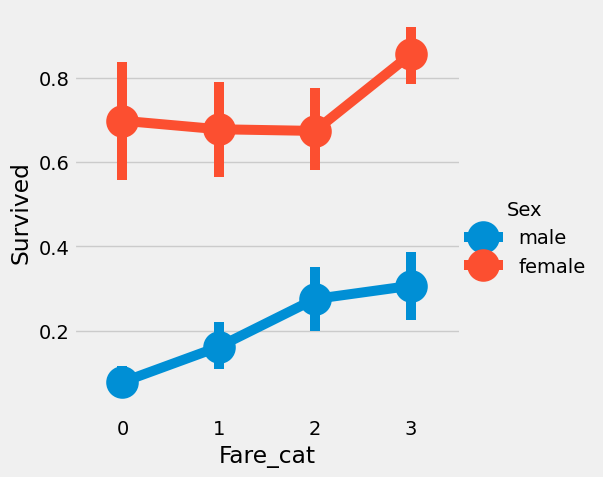

In [56]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

## Converting String Values into Numeric

In [57]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

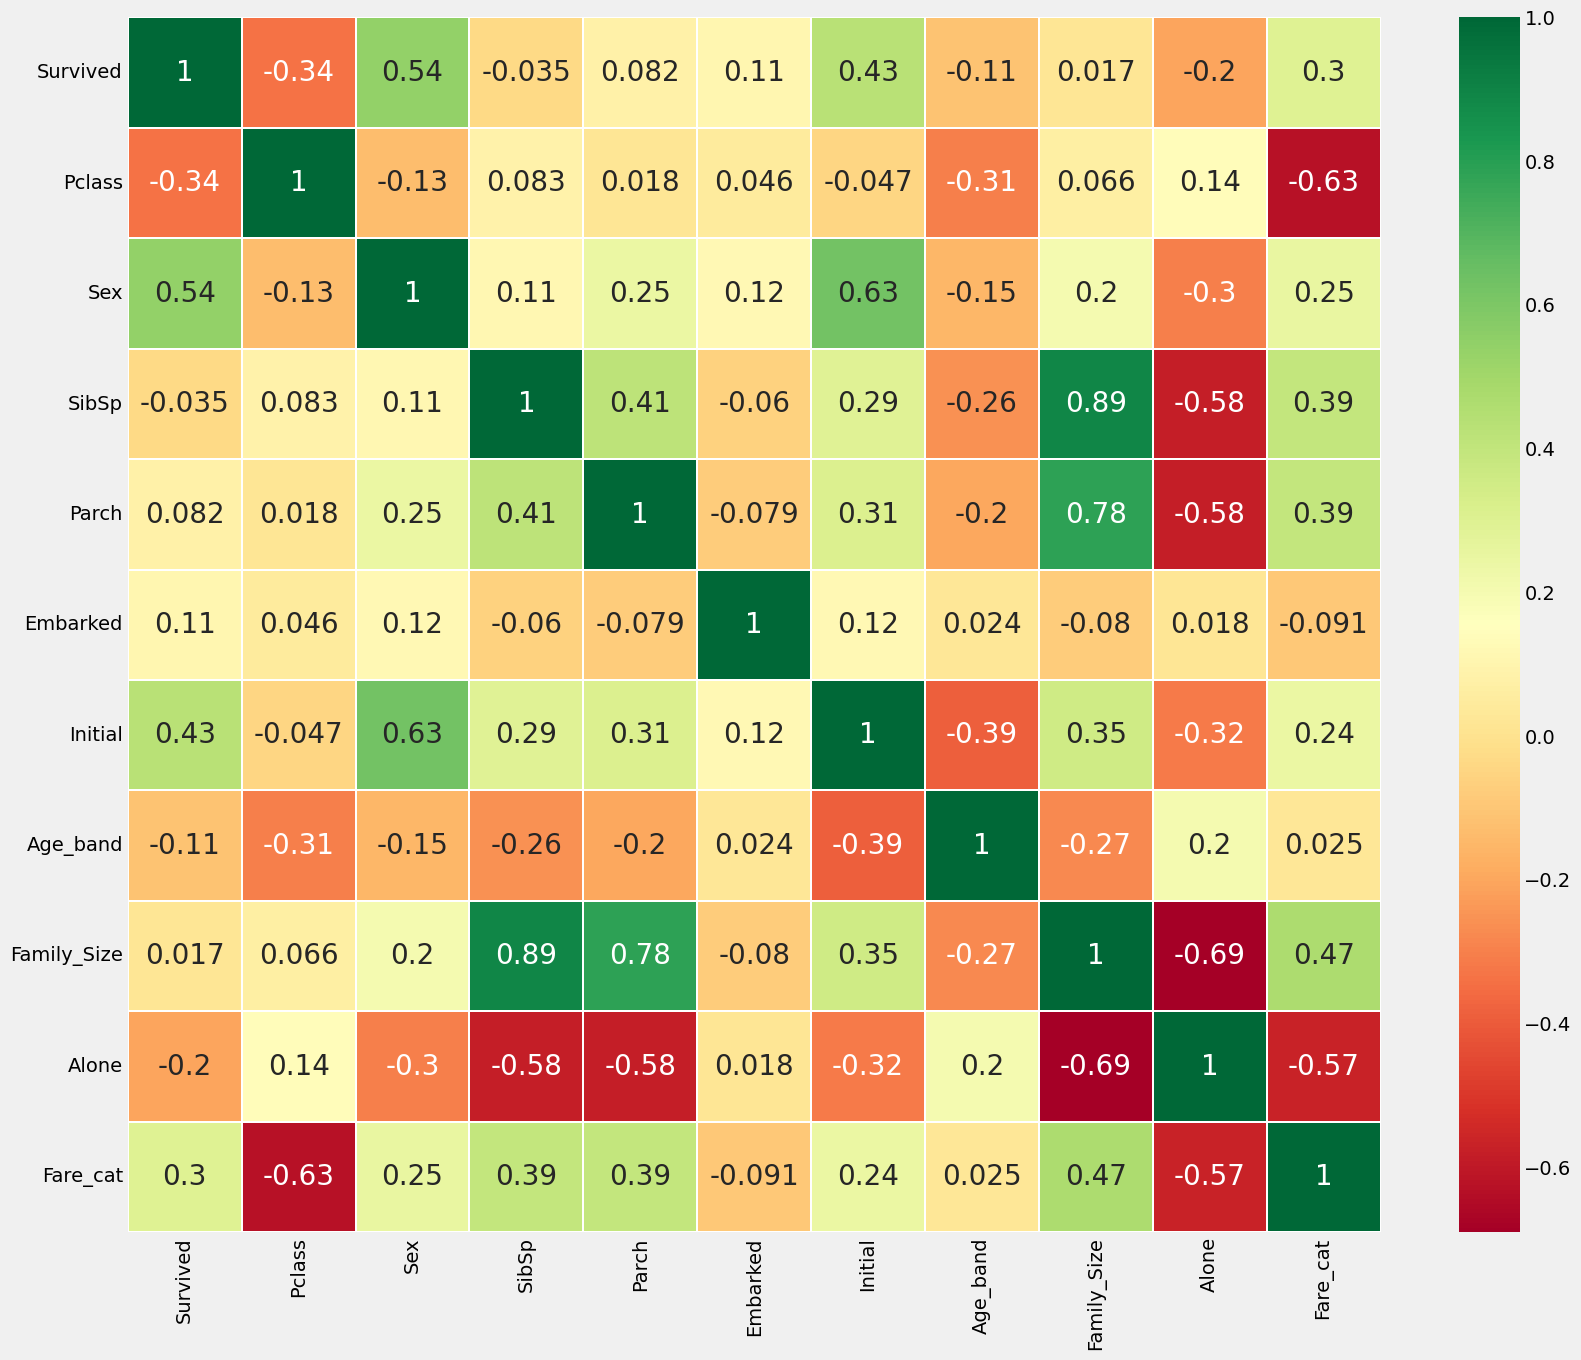

In [58]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [59]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [60]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [61]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [62]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [63]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [64]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbours(KNN)

In [65]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


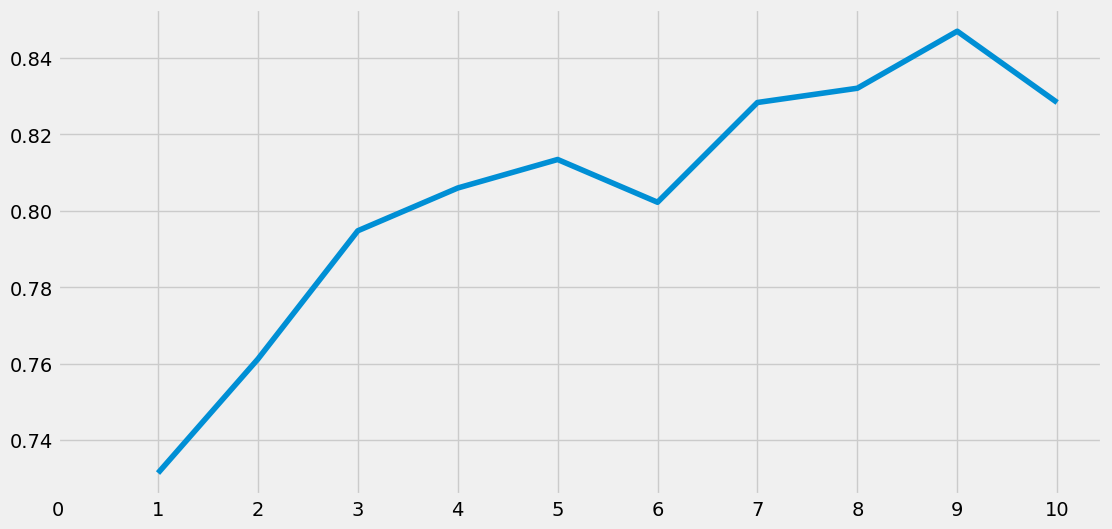

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [67]:
a_index = list(range(1, 11))
a = pd.Series()
x = list(range(0, 11))

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)

    # 정확도 점수를 Series에 추가
    accuracy = metrics.accuracy_score(test_Y, prediction)
    a = pd.concat([a, pd.Series([accuracy])], ignore_index=True)

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

### Gaussian Naive Bayes

In [68]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [69]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


# Cross Validation

In [71]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True,random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.804744,0.044277
Naive Bayes,0.795843,0.054861
Random Forest,0.818252,0.048565


<Axes: >

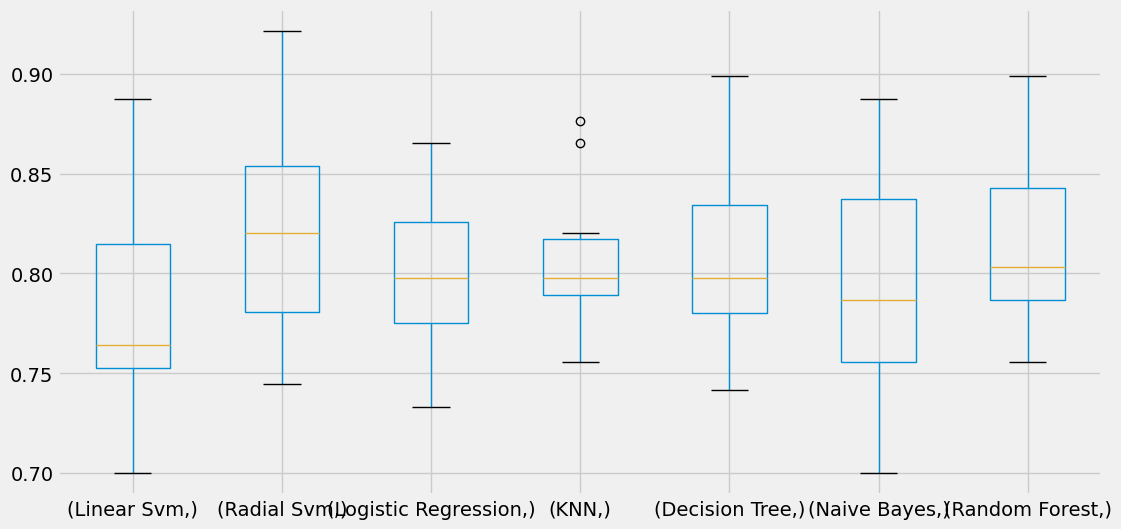

In [72]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

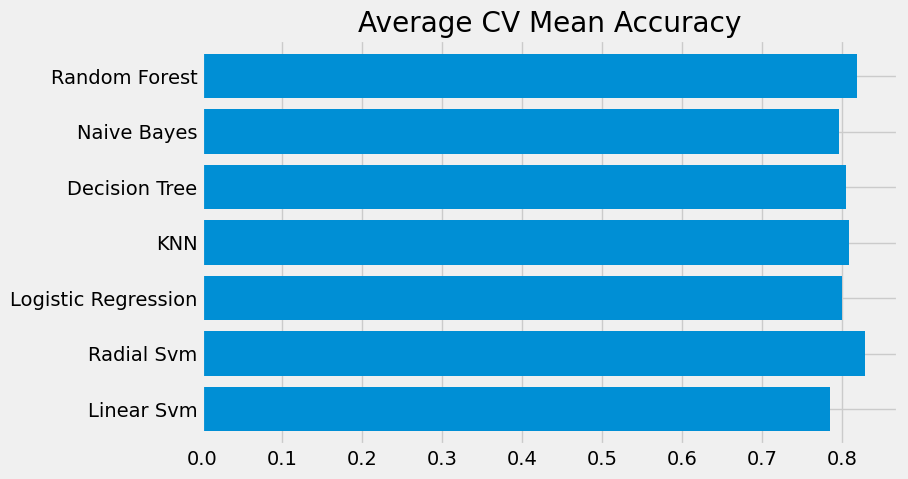

In [73]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

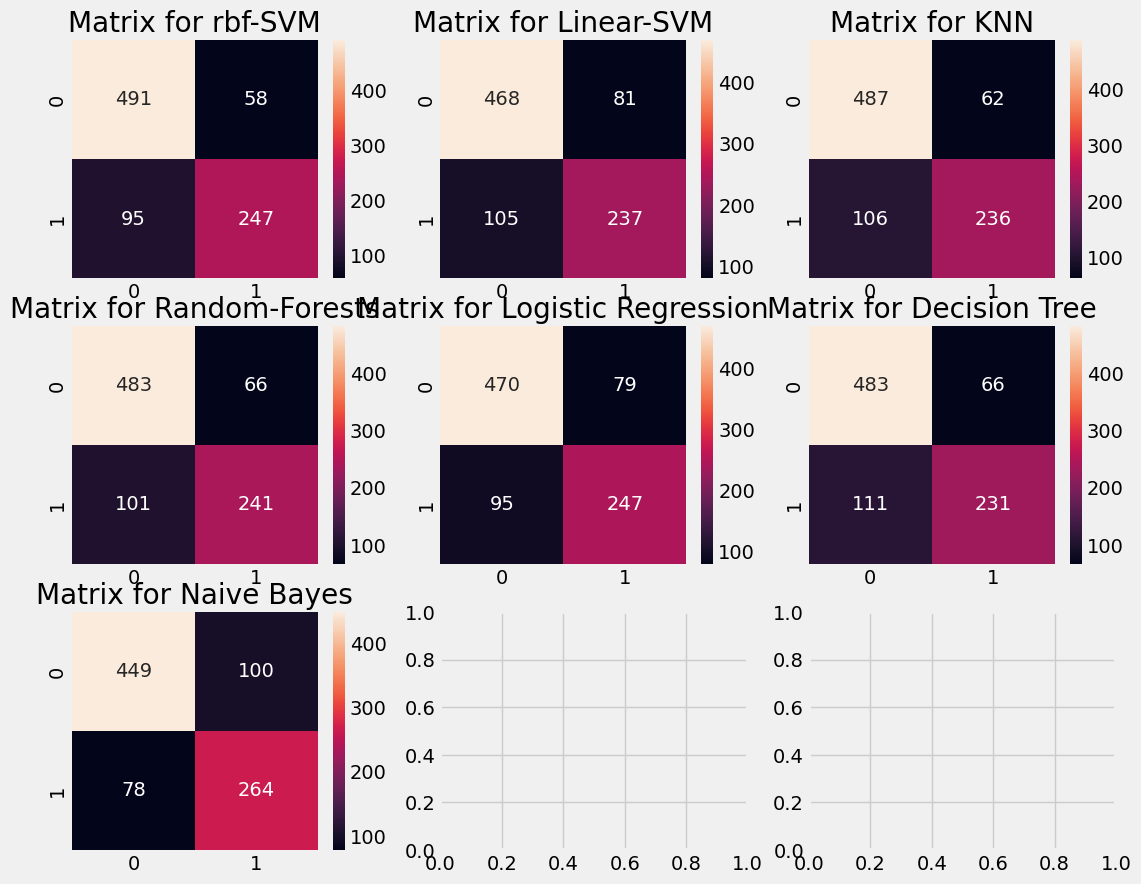

In [74]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

1)The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.

2)**Errors**-->  Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

### Hyper-Parameters Tuning

#### SVM

In [75]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [76]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


# Ensembling

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


## Bagging

#### Bagged KNN

In [79]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Bagged DecisionTree


In [80]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting

#### AdaBoost(Adaptive Boosting)

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [83]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


#### Hyper-Parameter Tuning for AdaBoost

In [84]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### Confusion Matrix for the Best Model

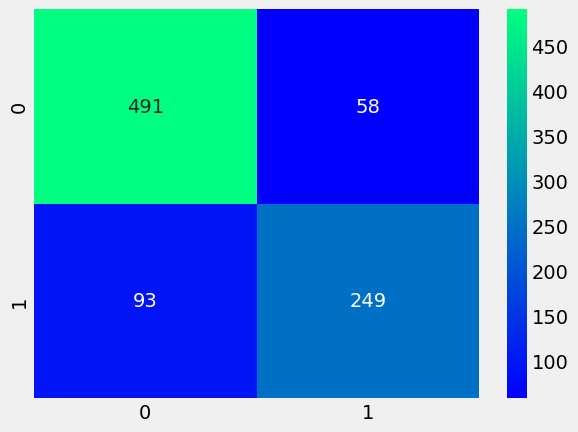

In [85]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

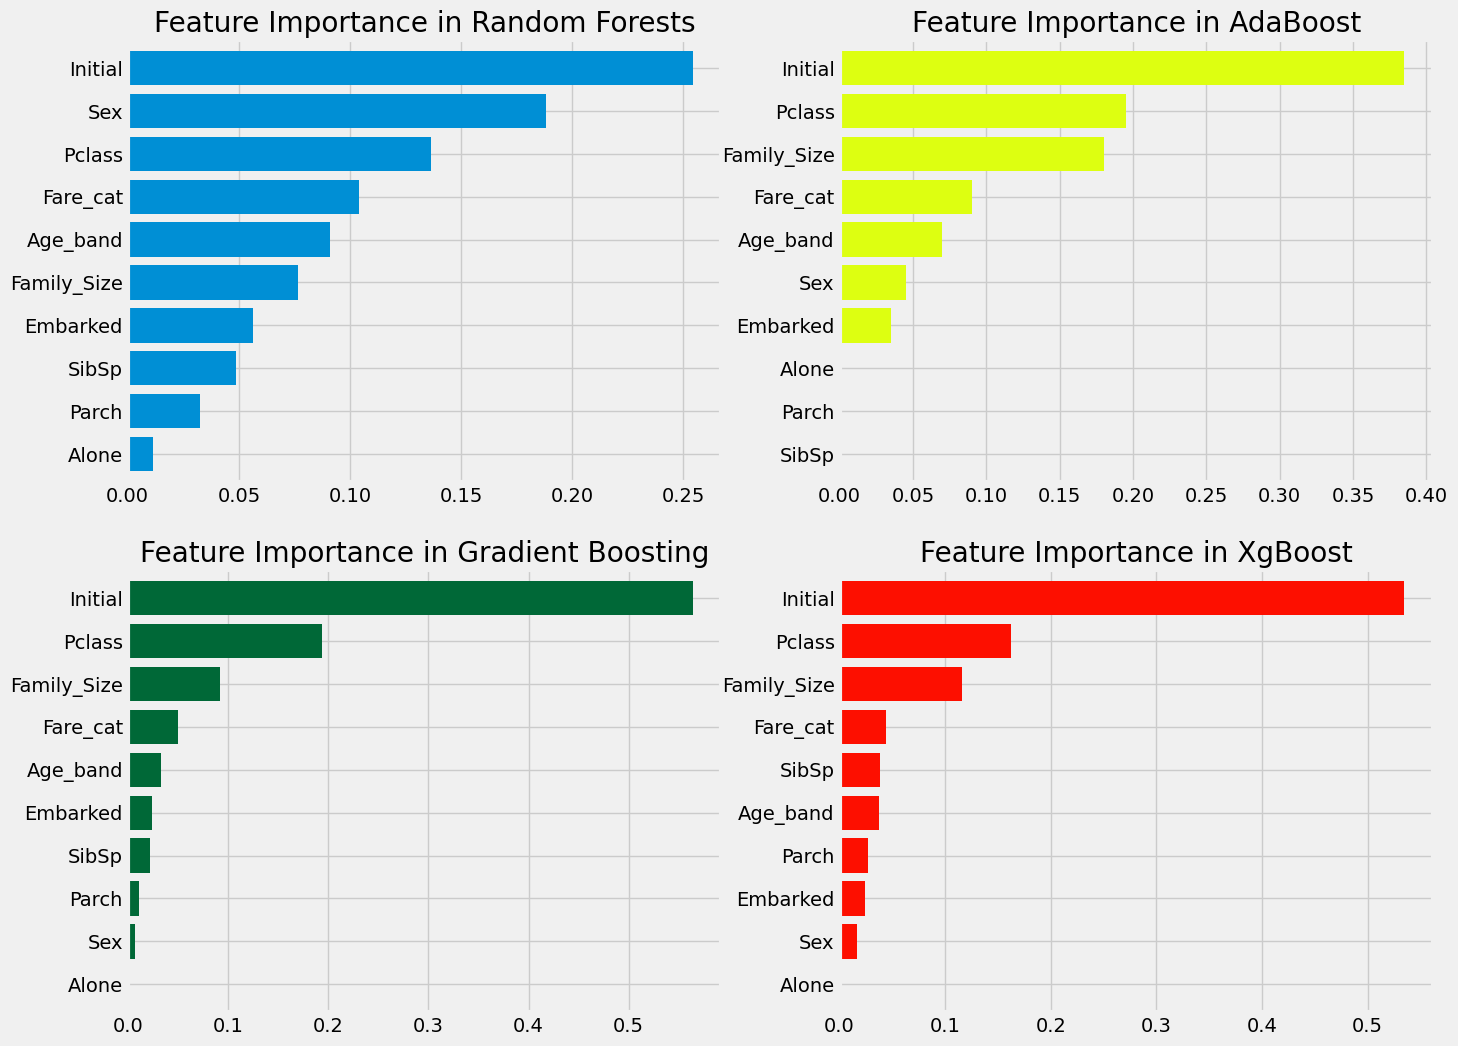

In [86]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

#### Observations:

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.